In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

## Load Data

In [81]:
data_path = r'data/Loan/loan-10k.lrn.csv'
df = pd.read_csv(data_path)
df

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,A
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,E
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,D
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,C
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6644,20000.0,20000.0,20000.0,60 months,16.02,486.58,5 years,OWN,54000.0,...,N,8,2017,11,1991,2,2019,2,2019,C
9996,25910,7500.0,7500.0,7500.0,36 months,9.49,240.22,10+ years,RENT,46386.0,...,N,10,2014,4,2004,3,2017,6,2018,B
9997,95698,20750.0,20750.0,20750.0,60 months,15.05,494.19,< 1 year,RENT,185000.0,...,N,4,2017,2,2004,2,2019,2,2019,C
9998,27371,11000.0,11000.0,11000.0,60 months,16.29,269.20,1 year,RENT,38500.0,...,N,9,2014,8,2006,3,2016,10,2016,D


## 2. Exploration

In [82]:
df = df.set_index("ID")
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,total_bc_limit,total_il_high_credit_limit,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15631.152500,15631.152500,15625.992500,13.216959,461.084183,8.212897e+04,19.089188,0.303400,698.179500,702.179700,...,2.423097e+04,48294.371800,5.77670,2016.003100,5.724600,2000.017900,4.003000,2017.747300,3.334200,2018.453400
std,9314.246117,9314.246117,9312.426843,4.855838,269.903751,6.769284e+04,9.523219,0.841201,32.170977,32.171893,...,2.539548e+04,46981.179499,3.40482,1.587496,3.382558,7.302583,3.224257,1.463235,2.909666,0.963494
min,1000.000000,1000.000000,1000.000000,5.310000,30.120000,5.000000e+03,0.000000,0.000000,660.000000,664.000000,...,2.000000e+02,0.000000,0.00000,2012.000000,0.000000,1965.000000,0.000000,2012.000000,0.000000,2012.000000
25%,8350.000000,8350.000000,8343.750000,9.750000,263.770000,5.000000e+04,12.437500,0.000000,675.000000,679.000000,...,8.800000e+03,18881.250000,3.00000,2015.000000,3.000000,1996.000000,2.000000,2017.000000,2.000000,2018.000000
50%,14000.000000,14000.000000,14000.000000,12.730000,396.780000,7.000000e+04,18.330000,0.000000,690.000000,694.000000,...,1.710000e+04,36533.500000,6.00000,2016.000000,6.000000,2001.000000,2.000000,2018.000000,2.000000,2019.000000
75%,21000.000000,21000.000000,21000.000000,16.010000,616.337500,9.700000e+04,24.930000,0.000000,715.000000,719.000000,...,3.140000e+04,63500.500000,9.00000,2017.000000,9.000000,2005.000000,6.000000,2019.000000,3.000000,2019.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1717.630000,3.200000e+06,168.520000,16.000000,845.000000,850.000000,...,1.090700e+06,768775.000000,11.00000,2018.000000,11.000000,2015.000000,11.000000,2019.000000,11.000000,2019.000000


In [83]:
# display(df.policy_code.describe())
# df.drop("policy_code", axis=1, inplace=True)

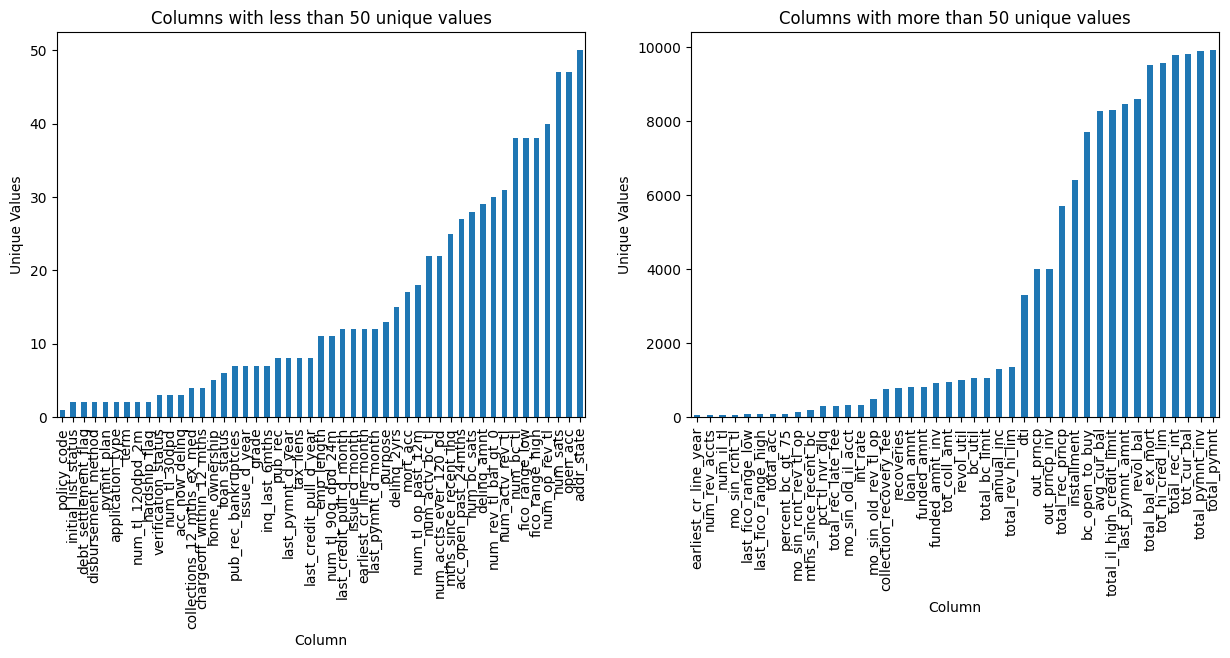

In [84]:
unique_values = df.nunique().sort_values()

less_than_50 = unique_values[unique_values <= 50]
more_than_50 = unique_values[unique_values > 50]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

less_than_50.plot(kind='bar', ax=ax1)
ax1.set_title('Columns with less than 50 unique values')

more_than_50.plot(kind='bar', ax=ax2)
ax2.set_title('Columns with more than 50 unique values')

for ax in [ax1, ax2]:
    ax.set_xlabel('Column')
    ax.set_ylabel('Unique Values')

plt.show()

<Axes: >

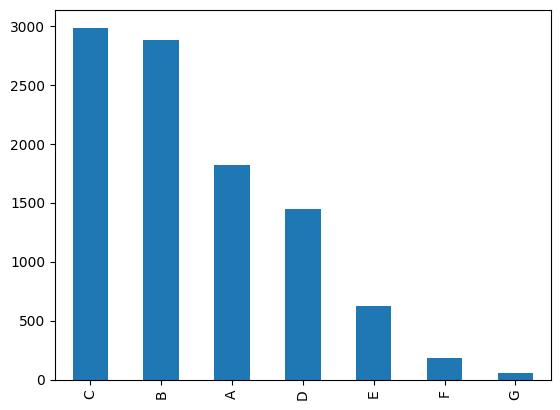

In [85]:
df['grade'].value_counts().plot(kind='bar')

In [86]:
df.select_dtypes(object)

,term,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,grade
ID,,,,,,,,,,,,,,
24341,36 months,< 1 year,MORTGAGE,Not Verified,Current,n,debt_consolidation,IL,w,Individual,N,Cash,N,A
67534,60 months,1 year,MORTGAGE,Source Verified,Current,n,debt_consolidation,OK,f,Individual,N,Cash,N,E
35080,60 months,< 1 year,RENT,Not Verified,Fully Paid,n,debt_consolidation,AZ,w,Individual,N,Cash,N,D
4828,36 months,9 years,RENT,Source Verified,Charged Off,n,debt_consolidation,CA,f,Individual,N,Cash,N,C
59259,36 months,1 year,MORTGAGE,Source Verified,Current,n,debt_consolidation,FL,w,Individual,N,Cash,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,60 months,5 years,OWN,Verified,Current,n,debt_consolidation,NJ,w,Individual,N,Cash,N,C
25910,36 months,10+ years,RENT,Source Verified,Charged Off,n,credit_card,NY,w,Individual,N,Cash,N,B
95698,60 months,< 1 year,RENT,Source Verified,Current,n,debt_consolidation,OR,w,Individual,N,Cash,N,C


<Axes: xlabel='int_rate', ylabel='grade'>

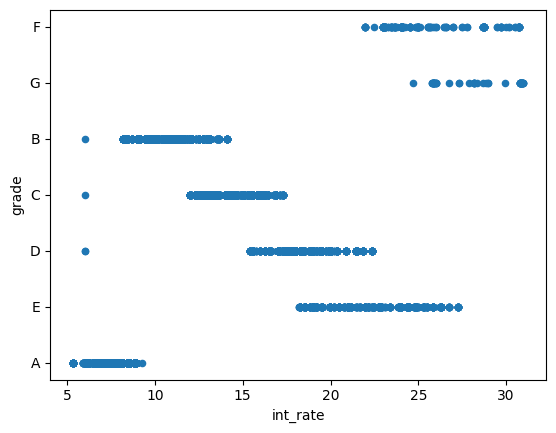

In [87]:
df.plot.scatter(x='int_rate', y ='grade')

In [88]:
# df_loc.hist(bins=30, figsize=(150,100))

In [89]:
# for c in df_loc.columns:
#     df_loc.plot.scatter(x=c, y ='grade')
# # df_loc = df_loc[df_loc.int_rate != 6.0]
# # df_loc.plot.scatter(x='int_rate', y ='grade')

In [90]:
#dti, last_fico_range_low have outliers but dont seem to be relevant features

# df_loc.plot.scatter(x='dti', y ='grade')
# plt.show()
# df_loc['dti'].hist()
# plt.show()
# df_loc['last_fico_range_low'].hist()
# plt.show()
# df_loc.plot.scatter(x='last_fico_range_low', y ='grade')

In [91]:
# from scipy.stats import zscore
# z = df_loc.apply(zscore)
# z = np.abs(z)
# z.max()[z.max()>50]
# df_loc['home_ownership_ANY'].hist()
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
ID,,,,,,,,,,,,,,,,,,,,,
24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,Not Verified,...,N,6,2018,6,2000,2,2019,2,2019,A
67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,Source Verified,...,N,10,2015,9,1984,2,2019,2,2019,E
35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,Not Verified,...,N,9,2017,10,2006,1,2018,11,2018,D
4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,Source Verified,...,N,0,2015,6,1996,6,2016,9,2017,C
59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,Source Verified,...,N,11,2016,0,2002,2,2019,2,2019,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,20000.0,20000.0,20000.0,60 months,16.02,486.58,5 years,OWN,54000.0,Verified,...,N,8,2017,11,1991,2,2019,2,2019,C
25910,7500.0,7500.0,7500.0,36 months,9.49,240.22,10+ years,RENT,46386.0,Source Verified,...,N,10,2014,4,2004,3,2017,6,2018,B
95698,20750.0,20750.0,20750.0,60 months,15.05,494.19,< 1 year,RENT,185000.0,Source Verified,...,N,4,2017,2,2004,2,2019,2,2019,C


In [92]:
def calculate_month_difference(month, year):
    target_month = 0  # January
    target_year = 2023

    total_months = (target_year - year) * 12  # Calculate the total months based on the difference in years
    total_months += target_month - month  # Add the remaining months from the target month

    return abs(total_months)


def preprocess_dataframes(df, train_test_split=False, enc_type='mix', month_label=False):
    df = df.copy()
    #add attriputes to keep the relative relationshp of dates before 1 hot encoding the months
    df["issue_d_month_rel"] = calculate_month_difference(df["issue_d_month"], df["issue_d_year"])
    df["earliest_cr_line_month_rel"] = calculate_month_difference(df["earliest_cr_line_month"], df["earliest_cr_line_year"]) 
    df["last_pymnt_d_month_rel"] = calculate_month_difference(df["last_pymnt_d_month"], df["last_pymnt_d_year"]) 
    df["last_credit_pull_d_month_rel"] = calculate_month_difference(df["last_credit_pull_d_month"], df["last_credit_pull_d_year"]) 

    #remove 6% outliers
    df = df[df.int_rate != 6.0]

    #transform data
    log_tranform_col = ['int_rate', 'annual_inc', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit']
    c_root_tranform_col = ['installment', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                        'total_il_high_credit_limit', 'total_bal_ex_mort', 'avg_cur_bal', 'bc_open_to_buy', 
                        'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt','tot_cur_bal']

    for col in c_root_tranform_col:
        df[col] = np.cbrt(df[col])
    for col in log_tranform_col:
        df[col] = np.log(df[col])
    
    df['grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,}, inplace=True)
    if enc_type == 'one_hot':
        pass

    elif enc_type == 'mix':
        df['emp_length'].replace({ '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,    
            '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}, inplace=True)
        df['loan_status'].replace({'Charged Off': 0, 'Current': 1,'Fully Paid': 2, 'In Grace Period': 3,  
            'Late (16-30 days)': 4, 'Late (31-120 days)': 5}, inplace=True)

    elif enc_type=='loc':
        df['emp_length'].replace({ '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,    
            '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}, inplace=True)
        df['loan_status'].replace({'Charged Off': 0, 'Current': 1,'Fully Paid': 2, 'In Grace Period': 3,  
            'Late (16-30 days)': 4, 'Late (31-120 days)': 5}, inplace=True)

        data_path_loc = r'data/Loan/states.csv'
        loc = pd.read_csv(data_path_loc, sep='\t')
        loc.columns
        loc = loc.drop('name', axis=1)
        df = pd.merge(df, loc, on="addr_state")
        df = df.drop('addr_state', axis=1)    
    else:
        print("ERROR n valid enc_type")
    for c in df.select_dtypes(object):
        if len(df.groupby([c]).size()) > 2:
            df = pd.get_dummies(df, prefix=[c], columns=[c])

    df = pd.get_dummies(df, drop_first=True)
    if month_label == False:
        df = pd.get_dummies(df, prefix=["issue_d_month"], columns=["issue_d_month"])
        df = pd.get_dummies(df, prefix=["earliest_cr_line_month"], columns=["earliest_cr_line_month"])
        df = pd.get_dummies(df, prefix=["last_pymnt_d_month"], columns=["last_pymnt_d_month"])
        df = pd.get_dummies(df, prefix=["last_credit_pull_d_month"], columns=["last_credit_pull_d_month"])

    X = df.loc[:, df.columns != 'grade']
    y = df.loc[:, df.columns == 'grade'] 
    if train_test_split:
        return train_test_split(X,y, random_state=0)
    else:
        return X, y

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,purpose_vacation,purpose_wedding,term_ 60 months,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y,grade
0,12500.0,12500.0,12500.0,1.975469,7.288429,0,11.302204,1,25.33,0.0,...,0,0,0,0,1,0,0,0,0,0
1,20000.0,20000.0,20000.0,2.607124,8.790598,4,11.289782,1,16.38,1.0,...,0,0,0,0,1,0,0,0,0,2
2,35000.0,35000.0,34900.0,2.564180,10.564591,7,11.813030,2,34.04,0.0,...,0,0,0,0,0,0,0,0,0,2
3,18000.0,18000.0,18000.0,2.544747,8.454148,0,11.373663,1,26.24,0.0,...,0,0,0,0,1,0,0,0,0,2
4,10000.0,10000.0,10000.0,1.822935,6.731978,5,11.350407,1,17.38,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,17050.0,17050.0,17050.0,2.673459,8.372016,10,10.896739,2,3.18,0.0,...,0,0,0,0,1,0,0,0,0,2
9992,3200.0,3200.0,3200.0,2.615935,4.775103,10,9.998798,2,23.29,0.0,...,0,0,0,0,0,0,0,0,0,2
9993,4800.0,4800.0,4800.0,1.975469,5.297661,5,10.819778,1,16.80,0.0,...,0,0,0,0,1,0,0,0,0,0
9994,12000.0,12000.0,12000.0,1.854734,7.160834,3,11.407565,2,7.32,4.0,...,0,0,0,0,1,0,0,0,0,0


<Axes: >

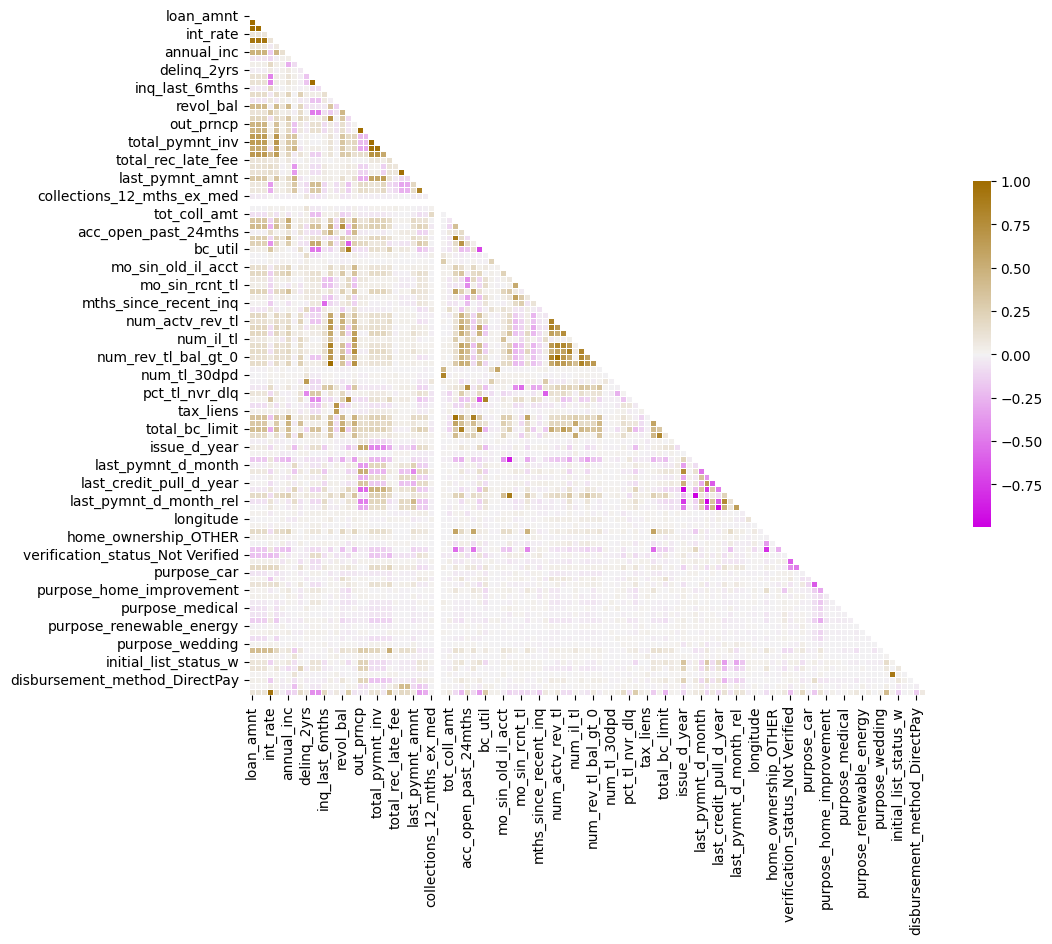

In [97]:
X, y = preprocess_dataframes(df.copy(), train_test_split=False, enc_type='loc', month_label=True)
df_corr = pd.concat([X, y], axis=1)
display(df_corr)
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 50, s=100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# # The pipeline can be used as any other estimator
# # and avoids leaking the test set into the train set
# pipe.fit(X_train, y_train)

# pipe.score(X_test, y_test)

# Data preprocessing

Encoding:
- 1-to-N: season
- label: high_fever, alcohol_consumption, smoking

Normalization: age, hours_sitting

Replace N (normal sample) with 0, O (altered sample) with 1

In [22]:
df = df.drop('season', axis=1).join(pd.get_dummies(df.season))
df['high_fever'].replace({'<3month': 2, '>3month': 1, 'no': 0}, inplace=True)
df['smoking'].replace({'never': 0, 'occasional': 1, 'daily': 2}, inplace=True)
df['alcohol_consumption'].replace({'several times/day': 4,
                                   'daily': 3,
                                   'several times/week': 2,
                                   'once/week': 1,
                                   'hardly ever/never': 0}, inplace=True)
df['diagnosis'].replace({'O': 1, 'N': 0}, inplace=True)